In [1]:
from models import BertForSequenceClassification
from models import BertConfig
from transformers import AutoTokenizer
import torch
import transformers
import re

In [2]:
import matplotlib.pyplot as plt

In [3]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

In [4]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased")

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [5]:
inputs = tokenizer("Hello, my dog is cute", 
                   max_length = 128, padding='max_length', truncation=True, return_tensors="pt")
labels = torch.tensor([1]).unsqueeze(0)  # Batch size 1

In [6]:
outputs = model(**inputs, labels=labels)

In [7]:
model.bert.layers_attention

tensor([[5.0268e-01, 2.3413e-02, 1.3848e-02, 7.9476e-03, 4.4138e-03, 2.8815e-01,
         3.5712e-04, 2.9806e-02, 3.7242e-03, 2.5821e-03, 4.4438e-02, 7.8647e-02]],
       grad_fn=<SoftmaxBackward>)

In [8]:
model.bert.layers_attention.detach().numpy().flatten()

array([5.0267535e-01, 2.3413287e-02, 1.3847613e-02, 7.9475688e-03,
       4.4138380e-03, 2.8814757e-01, 3.5712079e-04, 2.9806048e-02,
       3.7242009e-03, 2.5820869e-03, 4.4438474e-02, 7.8646764e-02],
      dtype=float32)

<BarContainer object of 12 artists>

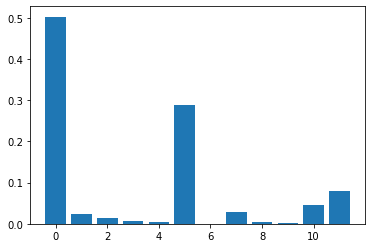

In [9]:
plt.bar(range(0, 12), model.bert.layers_attention.detach().numpy().flatten())